In [354]:
import cv2

img = cv2.imread('product1.jpg')
white_mask = (img[:,:,0] == 255) & (img[:,:,1] == 255) & (img[:,:,2] == 255)
img[white_mask] = [0, 0, 0]
rgba = cv2.cvtColor(img, cv2.COLOR_BGR2BGRA)
b, g, r, alpha = cv2.split(rgba)
alpha[alpha > 0] = 255
alpha[alpha == 0] = 200
result = cv2.merge((b, g, r, alpha))
tmp = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, alpha = cv2.threshold(tmp, 0, 255, cv2.THRESH_BINARY)


b, g, r = cv2.split(img)
rgba = [b, g, r, alpha]
dst = cv2.merge(rgba, 4)
cv2.imwrite("res.png", dst)


True

In [172]:
import cv2
import matplotlib.pyplot as plt
img = cv2.imread('product1.jpg', cv2.IMREAD_GRAYSCALE)
_, mask = cv2.threshold(img, 200, 255, cv2.THRESH_BINARY)

mask = cv2.bitwise_not(mask)
rgba = cv2.cvtColor(img, cv2.COLOR_GRAY2BGRA)
b, g, r, alpha = cv2.split(rgba)
alpha[mask > 0] = 255
alpha[mask == 0] = 0
result = cv2.merge((b, g, r, alpha))
cv2.imwrite("res.png", result)


True

This image is: <class 'numpy.ndarray'>  with dimensions: (1500, 2250, 3)


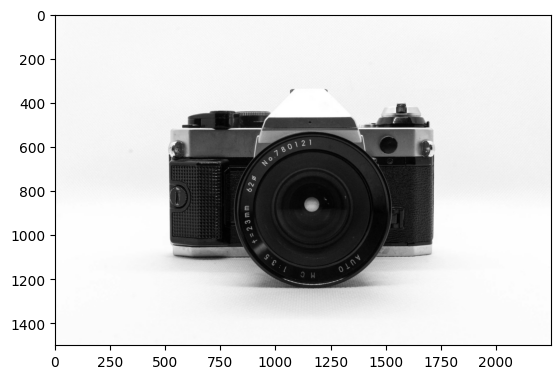

In [173]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
%matplotlib inline

image = cv2.imread('res.png')
print('This image is:', type(image),
      ' with dimensions:', image.shape)

image_copy = np.copy(image)
plt.imshow(image_copy)

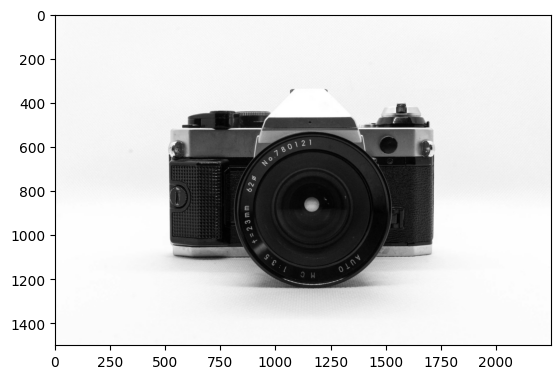

In [174]:
plt.imshow(image_copy)

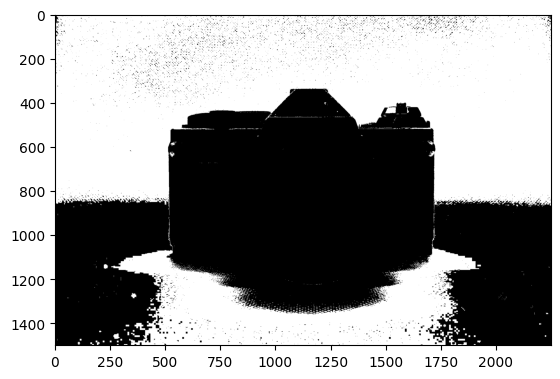

In [175]:
lower_blue = np.array([0,0,230])
upper_blue = np.array([250,250,255])
mask = cv2.inRange(image_copy, lower_blue, upper_blue)
plt.imshow(mask, cmap='gray')

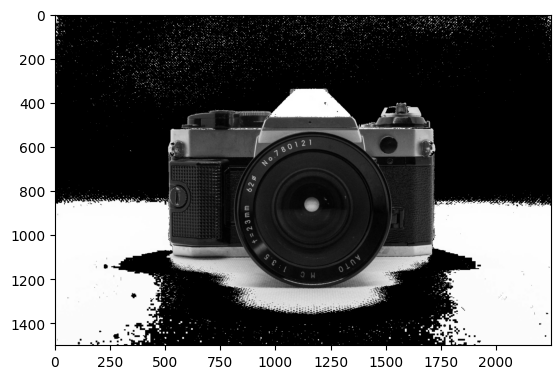

In [176]:
masked_image = np.copy(image_copy)
masked_image[mask != 0] = [0, 0, 0]
plt.imshow(masked_image)

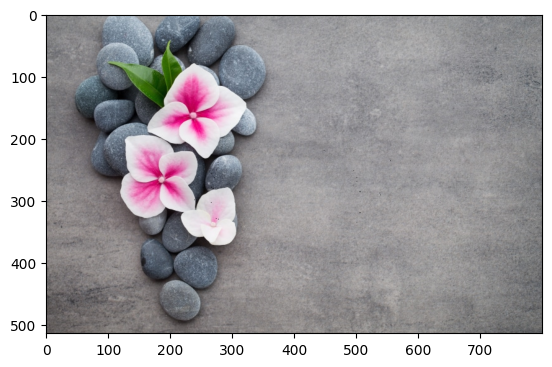

In [177]:

background_image = cv2.imread('background4.jpeg')
background_image = cv2.cvtColor(background_image, cv2.COLOR_BGR2RGB)
crop_background = background_image[0:514, 0:816]
mask = cv2.imread('res.png', cv2.IMREAD_GRAYSCALE)
# resized_mask = cv2.resize(mask, (420, 280))
# resized_mask = cv2.resize(mask, (768, 514))
resized_mask = cv2.resize(mask, (800, 514))
crop_background[resized_mask == 0] = [0, 0, 0]
masked_image = cv2.imread('res.png', cv2.IMREAD_COLOR)
masked_image = cv2.cvtColor(masked_image, cv2.COLOR_BGR2RGB)


plt.imshow(crop_background)
plt.show()

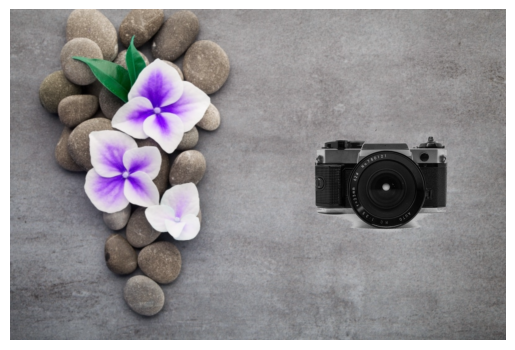

In [178]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

overlay_image = cv2.imread('res.png', cv2.IMREAD_UNCHANGED)
overlay_image_resized = cv2.resize(overlay_image, (0, 0), fx=0.5, fy=0.5)

background_image = cv2.imread('background4.jpeg')
background_image = cv2.resize(background_image, (masked_image.shape[1], masked_image.shape[0]))

overlay_height, overlay_width = overlay_image_resized.shape[:2]
background_height, background_width = background_image.shape[:2]
if overlay_height > background_height or overlay_width > background_width:
    raise ValueError("Overlay image dimensions exceed background image dimensions.")

x_offset = (background_width - overlay_width) //1
y_offset = (background_height - overlay_height) // 2

overlay_alpha = overlay_image_resized[:, :, 3] / 255.0

for c in range(3):
    background_image[y_offset:y_offset+overlay_height, x_offset:x_offset+overlay_width, c] = \
        background_image[y_offset:y_offset+overlay_height, x_offset:x_offset+overlay_width, c] * (1 - overlay_alpha) + \
        overlay_image_resized[:, :, c] * overlay_alpha

plt.imshow(background_image)
plt.axis('off')
plt.show()

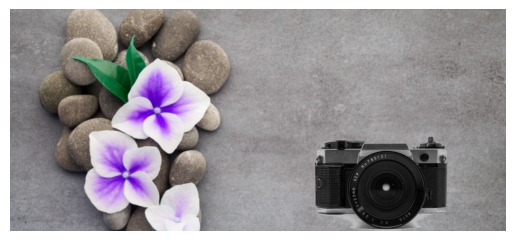

In [179]:
import cv2
final_result = background_image[:y_offset+overlay_height-120, :]
cv2.imwrite('final_image.png', final_result)
plt.imshow(final_result)
plt.axis('off')
plt.show()

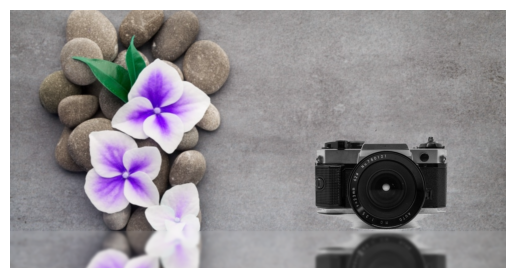

In [180]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
top = 100
btm = 100


img = cv2.imread('final_image.png')
hh, ww = img.shape[:2]
flip = np.flip(img, axis=0)
img = cv2.cvtColor(img, cv2.COLOR_BGR2BGRA)
gtop = 255 * top // 100
gbtm = 255 * btm // 100
grady = np.linspace(210, gbtm, hh, dtype=np.uint8)
grady_smooth = np.expand_dims(cv2.resize(grady, (ww, 1), interpolation=cv2.INTER_LINEAR), axis=0)

gradx = np.ones((hh, ww), dtype=np.uint8)
grad = grady_smooth * gradx

flip_blurred = cv2.GaussianBlur(flip, (35, 35), 0)
flip_blurred_alpha = cv2.cvtColor(flip_blurred, cv2.COLOR_BGR2BGRA)
flip_blurred_alpha[:, :, 3] = grad

hh, ww = img.shape[:2]
half_height = hh //6
result = np.vstack((cv2.cvtColor(img, cv2.COLOR_BGR2BGRA), flip_blurred_alpha[:half_height, :]))
# result = (cv2.cvtColor(img, cv2.COLOR_BGR2BGRA))

cv2.imwrite('final_image_ref4.png', result)
plt.imshow(result)
plt.axis('off')
plt.show()
